<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.9.7


In [ ]:
#!pip install tensorflow

In [ ]:
#!pip install tensorflow==2.0

In [ ]:
#!pip install --ignore-installed --upgrade tensorflow==2.6

In [2]:
import tensorflow as tf
tf.__version__

'2.9.1'

# Keras Syntax Basics

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Exploratory Data Analysis and Visualization

In [5]:
df = pd.read_csv("/Users/onurhanaydin/Desktop/Data Science/DL/DL-S2 (Installing Tensorflow _ Keras Syntext Basics-fake reg)/fake_reg.csv")
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


We can understand by looking the features that we will use regression polynomial.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


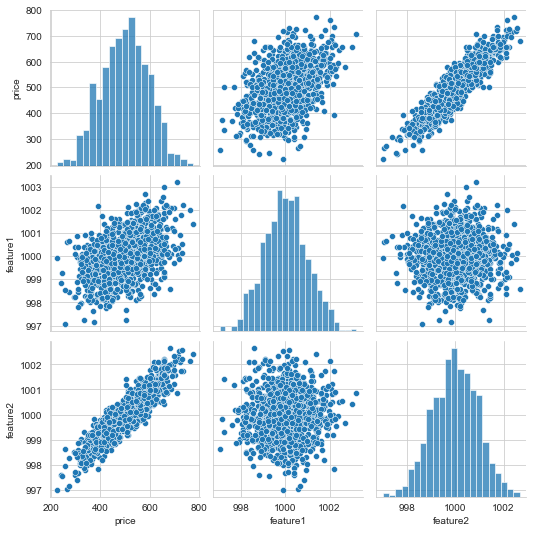

In [10]:
sns.pairplot(df);

In [11]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [12]:
from sklearn.model_selection import train_test_split

Deeplearning'de hız çok önemli olduğu için ve çok fazla işlem yapıldığı için veriyi array olarak aliyor.
O yüzden "values" olarak alıyoruz. 

In [13]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [14]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [15]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
X_train.shape

(700, 2)

In [18]:
X_test.shape

(300, 2)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train.max()

1.0

In [24]:
X_train.min()

0.0

Bu degerler normal.

In [25]:
X_test.max()

1.0186515935232023

In [26]:
X_test.min()

-0.014108392024525074

## Modelling

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

Sequential:

Genel bir yapi olusturmamizi sagliyor. Binanin iskeleti gibi.. Katmanlari belirliyor.

Dense:

Katman (layer) cinsi.
ANN'de en cok kullanacagimiz bu katman cinsi olacak.

In [28]:
# First way to create model

model = Sequential([Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

2022-08-11 00:49:42.834393: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Her bir dense, bir katmani temsil ediyor.
Birinci katmanda 4 neuron var. Bu neuron'larin aktivasyon fonksiyonu 'relu' methodu. Neuron sayisini degistirerek deneme yapiyoruz.

Output layer son katman (units=1)

Input layer belirtilmemis. Otomatik anliyor. Biz soylemek istersek

<code> input_dim = X_train.shape[1] </code>

 kullanmaliyiz.

In [29]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     # ,input_dim = X_train.shape[1])
# model.add(Dense(units = 4, activation = "relu" ,input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

Binanin ana catisini olusturduk. Icindeki esyalari doseyecegiz.

Bu yapimiz nasil calisacaksa compile parametreleri belirliyor.

Optimizer: optimize for a minimum error
loss: loss function

4 nöron seçmemizin bir mantığı yok. Genellikle 2 ve 2'nin katları şeklinde seçilir. Deneme yöntemiyle sonuca gidilir.

In [33]:
# optimizer, gradient descent'i uygulayıp min cost'u bulmaya çalışır
# loss, bizim cost function'ımız
# Regression problemleri için mse kullanılır

model.compile(optimizer = "rmsprop", loss = "mse") 

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [34]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 3ms/step - loss: 256574.1094
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 256464.3438
Epoch 3/250
22/22 [==============================] - 0s 3ms/step - loss: 256349.5156
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 256222.1562
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 256082.7031
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 255929.7188
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 255764.3438
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 255583.7969
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 255387.4531
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 255175.5156
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 254945.4688
Epoch 12/250
22/22 [==============================] - 0s 4ms/st

22/22 [==============================] - 0s 2ms/step - loss: 528.6761
Epoch 193/250
22/22 [==============================] - 0s 3ms/step - loss: 515.4763
Epoch 194/250
22/22 [==============================] - 0s 2ms/step - loss: 502.2330
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 488.4638
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 476.7622
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 462.4558
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 449.6049
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 437.1983
Epoch 200/250
22/22 [==============================] - 0s 3ms/step - loss: 425.1814
Epoch 201/250
22/22 [==============================] - 0s 4ms/step - loss: 413.9793
Epoch 202/250
22/22 [==============================] - 0s 4ms/step - loss: 401.8543
Epoch 203/250
22/22 [==============================] - 0s 3ms/step - loss: 389.8755
Epoch 

22/22 : train set = 700
neuron total : 32

700/32 => 21.875  -> 22


loss: 22. (sonuncu) iterasyon hata degeri


Farkli calismalar:
* loss: 39.3861
* loss: 24.0067



In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


summary:

2 x 4 = 8 neuron <br>
8+4 = 12 parametre



In [36]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 2.1726496 , -0.81679344,  2.4680634 , -0.48699927],
        [ 4.7467875 , -0.3564546 ,  5.0251527 , -0.6945543 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([1.2536858, 0.       , 1.2449737, 0.       ], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.41945586,  3.5756965 ,  0.7949204 ,  0.25546867],
        [ 0.2833634 , -0.5866779 , -0.7633423 , -0.7274885 ],
        [-0.10185921,  3.6681042 , -0.7691524 , -0.3179968 ],
        [-0.27686584, -0.02929616, -0.6078316 , -0.73288274]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.        ,  1.2306515 , -0.01897367,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 5.8606547e-01,  2.9248863e-01, -1.9346273e-01,  1.5041828e-03],
        [ 3.5010839e+00, -5.

weights: katman katman agirlik degerlerini ve bias degerlerini gorebiliriz.


history: olusan loss degerlerini gorelim..

In [37]:
model.history.history

{'loss': [256574.109375,
  256464.34375,
  256349.515625,
  256222.15625,
  256082.703125,
  255929.71875,
  255764.34375,
  255583.796875,
  255387.453125,
  255175.515625,
  254945.46875,
  254699.71875,
  254432.734375,
  254147.046875,
  253840.390625,
  253512.15625,
  253161.890625,
  252787.515625,
  252388.640625,
  251962.515625,
  251509.96875,
  251029.34375,
  250522.765625,
  249982.21875,
  249412.984375,
  248810.453125,
  248176.109375,
  247505.296875,
  246799.015625,
  246051.515625,
  245272.484375,
  244456.1875,
  243591.390625,
  242688.78125,
  241744.578125,
  240756.3125,
  239721.078125,
  238637.34375,
  237510.671875,
  236334.765625,
  235110.359375,
  233832.1875,
  232502.90625,
  231123.609375,
  229694.453125,
  228199.8125,
  226655.203125,
  225051.515625,
  223393.125,
  221668.640625,
  219889.671875,
  218055.390625,
  216146.96875,
  214186.078125,
  212156.75,
  210061.03125,
  207898.109375,
  205680.09375,
  203391.5625,
  201044.15625,
  1986

Bu degerleri gorsellestirip daha okunur hale getirelim:

In [38]:
pd.DataFrame(model.history.history)

,loss
0,256574.109
1,256464.344
2,256349.516
3,256222.156
4,256082.703
...,...
245,66.338
246,62.916
247,59.644
248,56.670


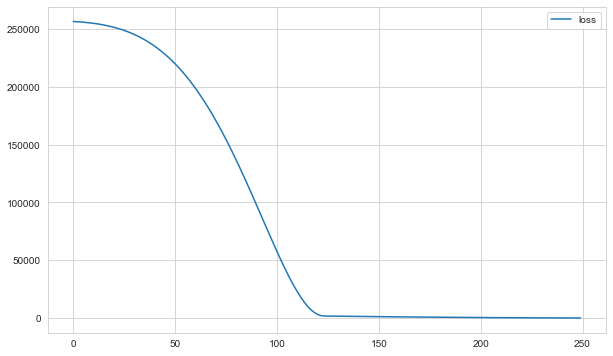

In [40]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

Ogrenme hizini bu egriden anliyoruz.

batch size: kac adimda bir agirliklarimi yenileyecegimi belirtir.

(0.0, 3000.0)

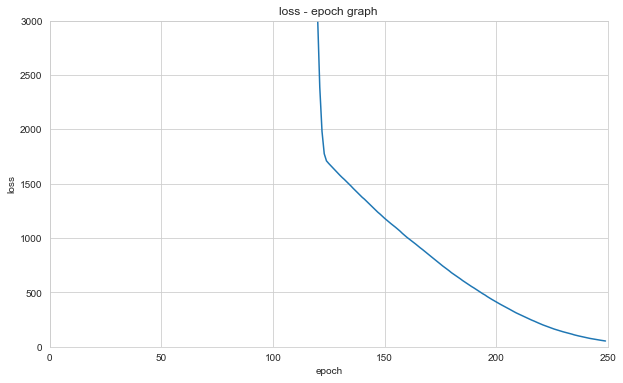

In [41]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

model 250'de ogrenme seviyesine gelmis. Her calistirmada bu degisebilir. Grafikten goruyoruz.

## Model Performance

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [43]:
model.evaluate(X_train, y_train, verbose=0)

52.06591033935547

Modelimi compile ederken 'rmse' yazmistim. O metrige gore bir deger verdi.

Bu fonksiyon arkaplanda prediction yapiyor.

In [44]:
model.evaluate(X_test, y_test, verbose=0)

51.73649978637695

Degerlerde problem gorunmuyor.

In [45]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [46]:
explained_variance_score(y_test, y_pred)

0.9941333655999768

Guzel bir deger. Neredeyse 1.00

In [47]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
193,524.473,525.395
198,497.465,493.628
125,618.934,608.842
79,633.451,631.868
103,578.224,570.745
89,487.188,489.092
96,323.747,331.966
299,410.538,417.005
112,515.325,522.190
195,645.708,638.539


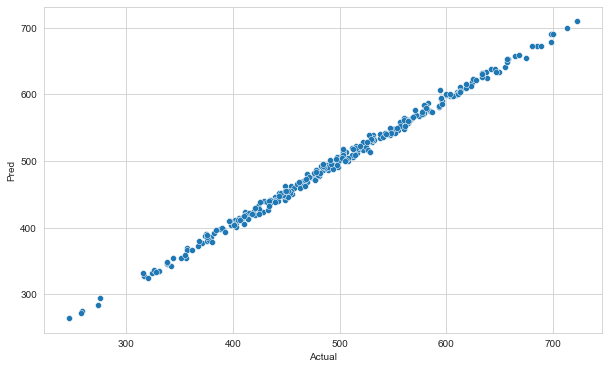

In [48]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare);

In [49]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [50]:
eval_metric(y_test, y_pred)

r2_score: 0.9941155225814128 
mae: 5.942757768812601 
mse: 51.736511798624804 
rmse: 7.192809729071443


Bu degeri karar vermek icin kullanabiliriz.

## Final Model and Model Deployment

In [51]:
scaler = MinMaxScaler().fit(X)

In [52]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [53]:
X_scaled = scaler.transform(X)

In [54]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 4ms/step - loss: 257026.2656
Epoch 2/250
32/32 [==============================] - 0s 6ms/step - loss: 256647.4531
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 256210.7969
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 255679.8750
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 255033.2656
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 254229.0469
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 253258.3125
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 252093.2031
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 250709.7500
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 249115.7500
Epoch 11/250
32/32 [==============================] - 0s 3ms/step - loss: 247276.3750
Epoch 12/250
32/32 [==============================] - 0s 3ms/st

Epoch 98/250
32/32 [==============================] - 0s 4ms/step - loss: 175.8058
Epoch 99/250
32/32 [==============================] - 0s 3ms/step - loss: 156.8685
Epoch 100/250
32/32 [==============================] - 0s 3ms/step - loss: 140.3046
Epoch 101/250
32/32 [==============================] - 0s 3ms/step - loss: 124.9696
Epoch 102/250
32/32 [==============================] - 0s 3ms/step - loss: 110.5285
Epoch 103/250
32/32 [==============================] - 0s 2ms/step - loss: 98.0051
Epoch 104/250
32/32 [==============================] - 0s 2ms/step - loss: 86.1667
Epoch 105/250
32/32 [==============================] - 0s 2ms/step - loss: 75.4391
Epoch 106/250
32/32 [==============================] - 0s 2ms/step - loss: 66.9367
Epoch 107/250
32/32 [==============================] - 0s 3ms/step - loss: 58.8525
Epoch 108/250
32/32 [==============================] - 0s 3ms/step - loss: 52.2868
Epoch 109/250
32/32 [==============================] - 0s 3ms/step - loss: 45.7557
E

H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

Daha onceki calistirdigimizda elde ettigimiz degerlerimize gore daha kotu bir sonuc elde edersek tekrar calistiralim. Benzer sonuclar ciktiysa bu modelimi sakliyorum.


H5 formati Keras icin gerekli.

In [55]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

## Prediction-1

In [56]:
from tensorflow.keras.models import load_model

In [57]:
model_fake_reg = load_model('model_fake_reg.h5')

In [58]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [59]:
sample = [[998, 1000]] # array olarak vermeliyiz

In [60]:
sample_scaled = scaler_fake_reg.transform(sample)

In [61]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 92ms/step


array([[420.49503]], dtype=float32)

## Prediction-2

In [62]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [63]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [64]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [65]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 24ms/step


array([[380.28137],
       [331.86407],
       [283.44672],
       [235.02937],
       [186.61203]], dtype=float32)